# Algoritmo Genetico
## Problema - Encontrar o maxímo global de uma Função

In [1]:
# importa as libs 

import numpy as np
import random


### funcao que implementa o problema

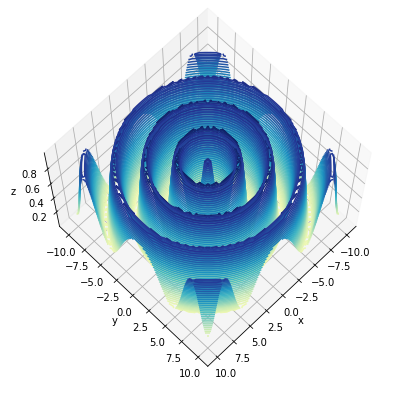

In [2]:
def f(x,y):
    return ( 0.5 - ( (((np.sin(np.sqrt(x**2 + y**2))) ** 2) - 0.5)/((1 + 0.001*(x**2 + y**2)) ** 2) ) )

from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 45, cmap='YlGnBu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(70, 45)

### cria a populacao

#### coluna 1  : x
#### coluna 2  : y
#### coluna 3  : valor da função em (x , y) 
#### coluna 4 :  aptidão
#### coluna 5 :  aptidão acumulada

In [4]:
valor_minimo = -10
valor_maximo = 10

numero_linhas  = numero_cromossomos = 10

numero_colunas = 6

# cria uma list com valores aleatorios
populacao = np.random.uniform(
    valor_minimo, 
    valor_maximo, 
    size = (numero_cromossomos, numero_colunas))

populacao = np.round(populacao,5)

# calcula o valor da funcao e a aptidao
for i in range(0 ,numero_linhas):
    # adiciona o indice
    populacao[i][5] = int(i) + 1
    # calcula a funcao
    populacao[i][2] = f( populacao[i][0] , populacao[i][1])
    # calcula a aptidao
    populacao[i][3] = ( 10 * (numero_cromossomos - (i + 1) ) ) / (numero_cromossomos - 1)
    
    
# calcula a aptidao acumulada 
populacao[0][4] = float(populacao[0][3])
for i in range(1,numero_linhas):
    populacao[i][4] = float(populacao[i][3]) + float(populacao[i-1][4])
    
populacao

array([[-7.81921   ,  5.37714   ,  0.91726048, 10.        , 10.        ,
         1.        ],
       [ 5.62407   ,  5.01996   ,  0.13848189,  8.88888889, 18.88888889,
         2.        ],
       [-6.11185   ,  5.82162   ,  0.3314154 ,  7.77777778, 26.66666667,
         3.        ],
       [ 3.22788   , -6.16001   ,  0.60291057,  6.66666667, 33.33333333,
         4.        ],
       [-5.78949   ,  9.01221   ,  0.16080567,  5.55555556, 38.88888889,
         5.        ],
       [ 3.95446   , -0.19343   ,  0.4688106 ,  4.44444444, 43.33333333,
         6.        ],
       [ 6.62201   ,  9.31648   ,  0.24752538,  3.33333333, 46.66666667,
         7.        ],
       [ 0.89415   , -0.51065   ,  0.26580637,  2.22222222, 48.88888889,
         8.        ],
       [ 5.15283   ,  6.32392   ,  0.13893899,  1.11111111, 50.        ,
         9.        ],
       [-6.01648   , -8.29738   ,  0.46813698,  0.        , 50.        ,
        10.        ]])

### plota os elementos da populacao

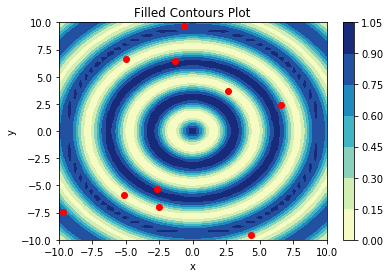

In [4]:
x = np.linspace(valor_minimo, valor_maximo, 50)
y = np.linspace(valor_minimo, valor_maximo, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ponto_x = [row[0] for row in populacao]
ponto_y = [row[1] for row in populacao]

import matplotlib.pyplot as plt

fig, ax = plt.subplots()  
cp = plt.contourf(X, Y, Z , cmap = 'YlGnBu')
plt.colorbar(cp)
ax.scatter(ponto_x,ponto_y,c ='red')
plt.title('Filled Contours Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## efetua a seleção de cromossomos

In [5]:
# cria um vetor diversidade
# vetor diversidade eh composto por valores entre o valor
# da primeira e da ultima aptidao acumulada
# COLUNA 1 - valor da diversidade
# COLUNA 2 - cromossomo escolhido

diversidade = np.random.uniform(
    float(populacao[0][3]),             # primeira apt acumulada
    float(populacao[numero_linhas - 1][3]), # ultima apt acumulada
    size = (numero_linhas,2)
)

for item in diversidade:
    for cromossomo in populacao:
        if(item[0] <= cromossomo[3]):
            item[1] = int(cromossomo[4]); #seleciona - salva o indice
            break
            
selecionados = [int(row[1]) for row in diversidade]  
selecionados

[1, 3, 7, 4, 9, 1, 1, 1, 7, 3]

## efetua o crossover

In [6]:
# efetua o crossover em pares

# 8% de chances de cruzar
TAXA_CRUZAR = 0.65

# porcentagem de mutacao - crossover aritmetico
alfa = np.random.uniform(0,1)

for item_diversidade in range(0,numero_linhas ,2):

    # SORTEIA se o casal vai mutar
    vai_cruzar = np.random.uniform(0,1)
    
    if(vai_cruzar <= TAXA_CRUZAR ):

        # taxa de passagem de genes
        alfa = np.random.uniform(0,1)

        # salva o indice dos cromossomos que irao cruzar
        indice_cromossomo_1 = int(selecionados[item_diversidade    ])
        indice_cromossomo_2 = int(selecionados[item_diversidade + 1]) 
        
        print("cruzou o %d e o %d" % (indice_cromossomo_1  , indice_cromossomo_2) )

        # seleciona os pares na populacao
        par_1 = populacao[ indice_cromossomo_1 ]
        par_2 = populacao[ indice_cromossomo_2 ]

        # cruza os xs dos filhos
        x_filho_1 = np.clip( 
            alfa * par_1[0] + (1 - alfa) * par_2[0] ,
            valor_minimo,valor_maximo )
        
        x_filho_2 = np.clip( 
            alfa * par_2[0] + (1 - alfa)*par_1[0] ,
            valor_minimo,valor_maximo )

        # cruza os ys dos filhos
        y_filho_1 = np.clip( 
            alfa * par_1[1] + (1 - alfa) * par_2[1] ,
            valor_minimo,valor_maximo )
        y_filho_2 = np.clip( 
            alfa * par_2[1] + (1 - alfa)*par_1[1] ,
            valor_minimo,valor_maximo )
        
        
        print("filho 1 : de (%f,%f) para (%f,%f) : substitui o pai %d" %  
              (
                  populacao[indice_cromossomo_1][0] , 
                  populacao[indice_cromossomo_1][1] ,
                  x_filho_1,
                  y_filho_1,
                  indice_cromossomo_1
              ))
        
        
        print("filho 2 : de (%f,%f) para (%f,%f) : substitui o pai %d " %  
              (
                  populacao[indice_cromossomo_2][0] , 
                  populacao[indice_cromossomo_2][1] ,
                  x_filho_2,
                  y_filho_2,
                  indice_cromossomo_2
              )) 
        
        print("\n")

        # substitui os novos filhos na populacao
        # eliminandos os pais
        populacao[indice_cromossomo_1][0] = x_filho_1
        populacao[indice_cromossomo_1][1] = y_filho_1

        populacao[indice_cromossomo_2][0] = x_filho_2
        populacao[indice_cromossomo_2][1] = y_filho_2
        
       

cruzou o 1 e o 3
filho 1 : de (-0.619763,9.640854) para (-1.624731,7.743114) : substitui o pai 1
filho 2 : de (-9.660014,-7.430378) para (-8.655046,-5.532638) : substitui o pai 3 


cruzou o 7 e o 4
filho 1 : de (-1.292511,6.422076) para (-1.887201,-0.237983) : substitui o pai 7
filho 2 : de (-2.490751,-6.997258) para (-1.896061,-0.337199) : substitui o pai 4 


cruzou o 1 e o 1
filho 1 : de (-1.624731,7.743114) para (-1.624731,7.743114) : substitui o pai 1
filho 2 : de (-1.624731,7.743114) para (-1.624731,7.743114) : substitui o pai 1 




## efetuamos a mutação

In [7]:
ALFA_PARA_MUTAR = 0.1
FATOR_DE_MUTACAO = np.random.uniform(0,1)

for cromossomo in populacao:
    vai_mutar_x = np.random.uniform(0,1)
    if(vai_mutar_x > ALFA_PARA_MUTAR):
        cromossomo[0] = np.random.uniform(
            cromossomo[0] - FATOR_DE_MUTACAO,
            cromossomo[0] + FATOR_DE_MUTACAO
        )
        cromossomo[0] = np.clip( cromossomo[0],valor_minimo,valor_maximo)

    vai_mutar_y = np.random.uniform(0,1)
    if(vai_mutar_y > ALFA_PARA_MUTAR):
        cromossomo[1] = np.random.uniform(
            cromossomo[1] - FATOR_DE_MUTACAO,
            cromossomo[1] + FATOR_DE_MUTACAO
        )
        cromossomo[1] = np.clip( cromossomo[1],valor_minimo,valor_maximo)

## recalculamos os parametros da populacao

In [8]:
# calcula a aptidao
for i in range(0,numero_linhas):
    populacao[i][2] = f( populacao[i][0] , populacao[i][1])
    # adiciona o indice
    populacao[i][4] = int(i)
    
# calcula a aptidao acumulada 
populacao[0][3] = float(populacao[0][2])
for i in range(1,numero_linhas):
    populacao[i][3] = float(populacao[i][2]) + float(populacao[i-1][3])
    
ponto_x = [row[0] for row in populacao]
ponto_y = [row[1] for row in populacao]

populacao

array([[-1.92468597, -4.68285097,  0.13680225,  0.13680225,  0.        ],
       [-0.96469209,  7.74311353,  0.05805462,  0.19485687,  1.        ],
       [ 7.00514368,  2.81938775,  0.1320532 ,  0.32691007,  2.        ],
       [-9.5911518 , -5.60360996,  0.1138025 ,  0.44071257,  3.        ],
       [-1.18501081, -0.33719852,  0.11160499,  0.55231756,  4.        ],
       [ 2.89046426,  4.01353857,  0.0746694 ,  0.62698696,  5.        ],
       [-5.8646535 , -6.66496526,  0.69720574,  1.3241927 ,  6.        ],
       [-1.36236702,  0.50599455,  0.01579003,  1.33998273,  7.        ],
       [-4.9663447 ,  6.69043691,  0.24803101,  1.58801374,  8.        ],
       [ 4.349918  , -9.67730315,  0.2103355 ,  1.79834924,  9.        ]])

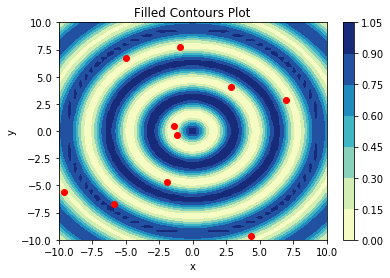

In [9]:
## plotar os elementos novos

x = np.linspace(valor_minimo, valor_maximo, 50)
y = np.linspace(valor_minimo, valor_maximo, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ponto_x = [row[0] for row in populacao]
ponto_y = [row[1] for row in populacao]

import matplotlib.pyplot as plt

fig, ax = plt.subplots()  
cp = plt.contourf(X, Y, Z , cmap = 'YlGnBu')
plt.colorbar(cp)
ax.scatter(ponto_x,ponto_y,c ='red')
plt.title('Filled Contours Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()